   # MID EXAM ANSWER
    #NAME        : EDWARD
    #NIM         : 2201741971
    #CLASS       : LB-08
    #LECTURER    : Dr. Ir. Diaz D. Santika, M.Sc.
    #COURSE CODE : COMP7116
    #COURSE NAME : Computer Vision
    #UNIVERSITY  : BINA NUSANTARA

## 1.Point processing transformations (25%) 
    #These are four-point processing transformations: 
        #i.	• Thresholding 
        #ii.	• Gray-scaling 
        #iii.	• Negative transformation 
        #iv.	• Histogram Equalization 
    #Implement all above point processing transformations. It can be done by using OpenCV library

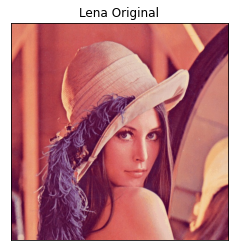

In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#Because the image file format is still in gif, then first I will change the file format to jpg in the following way:
gif = cv2.VideoCapture('lena_color.gif')
ret, frame = gif.read()
cv2.imwrite('lena_color.jpg', frame)

#After that, I use Test if the image can be read and shown after convert the format
img = cv2.imread("lena_color.jpg")

#Converts from one colour space to the other
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.title('Lena Original')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

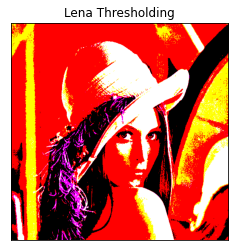

In [34]:
# 1) THRESHOLDING
  # Call the Threshold function, I use Binary Threshold
ret,thresh1 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)
plt.title('Lena Thresholding')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

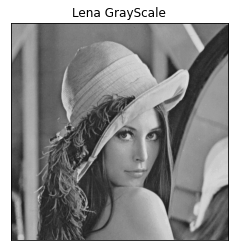

In [35]:
# 2) Gray-scaling
  #Convert Image to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.title('Lena GrayScale')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.imshow(gray, cmap='gray', vmin = 0, vmax = 255)

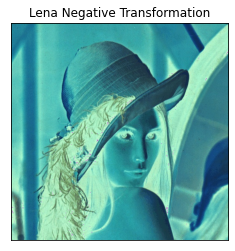

In [36]:
# 3) Negative Transformation
  #Reverse the image with negative
img_neg = 1 - img2
plt.imshow(img_neg)
plt.title('Lena Negative Transformation')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

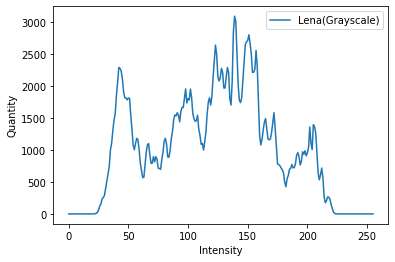

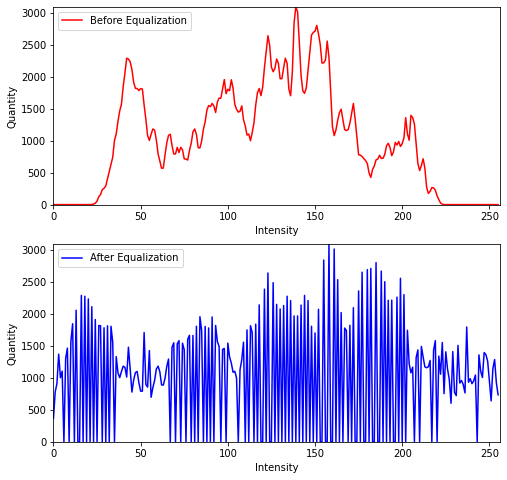

In [37]:
# 4) Histogram Equalization
#Getting image Height
gray_height = img.shape[0]
#Getting image width
gray_width = img.shape[1]

#Count Pixels for Each Intensities
gray_counter = np.zeros(256, dtype=int)

for i in range(gray_height):
    for j in range(gray_width):
        #Pixel Intensities on Coordinates(i,j)
        gray_counter[gray[i][j]] += 1
plt.figure(1)
plt.plot(gray_counter, label = 'Lena(Grayscale)')
plt.legend(loc='upper right')
plt.ylabel('Quantity')
plt.xlabel('Intensity')
plt.show()

# Apply Histogram Equalization
equ = cv2.equalizeHist(gray) 
equ_counter = np.zeros(256, dtype=int)
for i in range(gray_height):
    for j in range(gray_width):
        equ_counter[equ[i][j]] += 1

# Plotting with matplotlib
plt.figure(1, figsize=(8, 8))

#Plot Before EqualizeHist
plt.subplot(2, 1, 1)
plt.plot(gray_counter, 'r', label='Before Equalization')
plt.legend(loc='upper left')
plt.ylabel('Quantity')
plt.xlabel('Intensity')
plt.axis([0, 256, 0, gray_counter.max() if (gray_counter.max() > equ_counter.max()) else equ_counter.max()])

#Plot After EqualizeHist
plt.subplot(2, 1, 2)
plt.plot(equ_counter, 'b', label='After Equalization')
plt.legend(loc='upper left')
plt.ylabel('Quantity')
plt.xlabel('Intensity')
plt.axis([0, 256, 0, gray_counter.max() if (gray_counter.max() > equ_counter.max()) else equ_counter.max()])
plt.show()

## 2. Convolution (25%) 
    #The first step is you load the image (opera_house.jpg) and convert it into grayscale. 
    #It can be done by using Pillow library. And the two 3x3 kernels

    #Please find the solution for: Convolution operation without border padding
        #a.	Implement the above calculations using Numpy library. 
        #b.	Convert above Numpy array to images and show the results. The implementation can use Pillow library

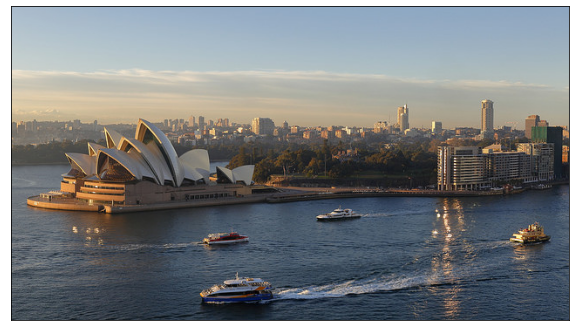

In [38]:
from PIL import Image,ImageOps  
import matplotlib.pyplot as plt
import numpy as np

opera= Image.open('Sydney-Opera-House.jpg')
plt.figure(figsize = (10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(opera)

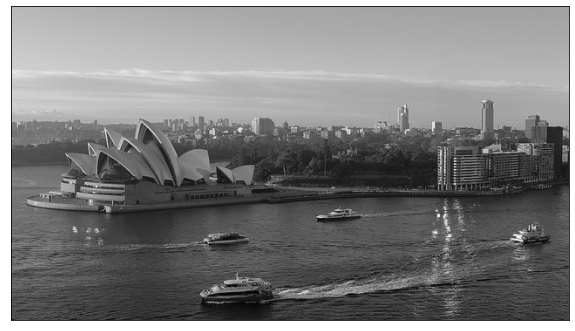

In [39]:
# converting to gray scale 
gray_img = ImageOps.grayscale(opera)
plt.figure(figsize = (10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(gray_img,cmap = "gray")

In [41]:
#a.	Implement the above calculations using Numpy library. 

#calculatint the final input shape 
def getOutputShape(x,kernel_size):  
    kernel_size = 3 
    new_width = x[0] - kernel_size + 1 
    new_height = x[1] - kernel_size + 1
    print("Input height : ",x[0]," Output height : ",new_width)
    print("Input width : ",x[1]," Output width : ",new_height)
    return new_width,new_height 
getOutputShape(gray_img.size,3)

### convolution function 
def conv(img,kernel):
    #converting image to numpy array. 
    img = np.asarray(img)
    
    #calculate the new shape 
    kernel_size = kernel.shape[0]
    new_shape = getOutputShape(img.shape,kernel_size)
    
    #output image array.
    out = np.zeros(shape = new_shape)
    
    for x in range(out.shape[0]):
        for y in range(out.shape[1]):
            sum = 0
            for i in range(kernel.shape[0]):
                for j in range(kernel.shape[1]):
                    sum += img[x+i][y+j] * kernel[i][j]
            # the below lines does 2 things
            # mods sum remember only +ve values of pixels are allowed 
            # it also takes core that the pixel
            sum = np.abs(sum)
            if sum > 255.: 
                sum = 255.0
            out[x,y] = sum                    
    return np.round(out)

Input height :  640  Output height :  638
Input width :  360  Output width :  358


Input height :  360  Output height :  358
Input width :  640  Output width :  638
Input height :  360  Output height :  358
Input width :  640  Output width :  638


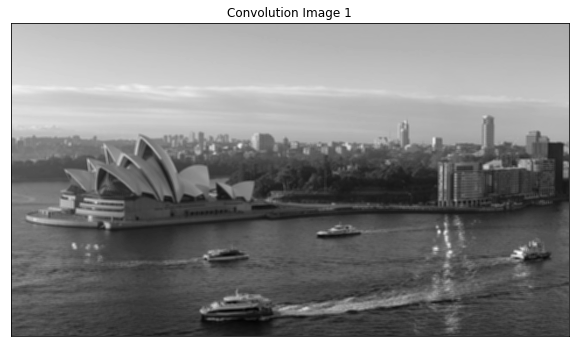

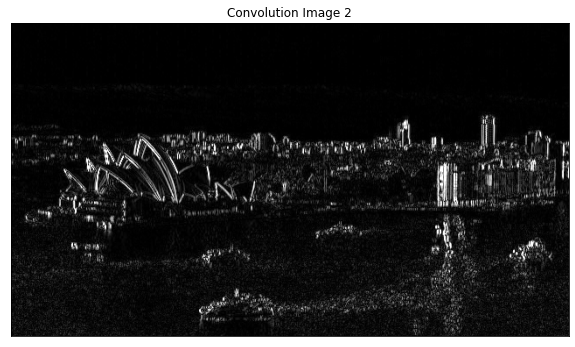

In [42]:
#b.	Convert above Numpy array to images and show the results. The implementation can use Pillow library

# convolution image 1. 
kernel_1 = np.ones((3,3)) * 1/9 
output_image_1 = conv(gray_img,kernel_1)
plt.figure(figsize = (10,10))
plt.title('Convolution Image 1')
plt.xticks([]), plt.yticks([])
plt.imshow(output_image_1,cmap = "gray")


kernel_2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
output_image_2 = conv(gray_img,kernel_2)
plt.figure(figsize = (10,10))
plt.title('Convolution Image 2')
plt.xticks([]), plt.yticks([])
plt.imshow(output_image_2,cmap = "gray")

## 3.	Harris corner detector (25%) 
    #Please answer below questions related to Harris corner detection as follow:
        #The first step is you load the image (checkerboard_101.png) and implement Harris corner detector.
        #It can be done by using OpenCV library.

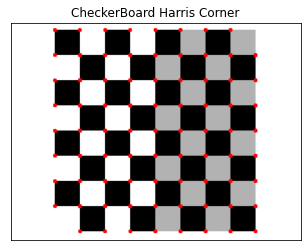

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('checkerboard_101.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst,None)

# Define thresh hold (thresh value inversely proportional to corner visbility )
thresh = 0.01*dst.max()

# Create copy of rgb image to draw corners on it.
corner_image = np.copy(image)

# Iterate through all the corners and draw them on the image 
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (255,0,0), 10)


plt.imshow(corner_image)
plt.title('CheckerBoard Harris Corner')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

## 4. Canny edge detector (25%) 
    #Canny edge detector was developed by John F. Canny in 1986 and uses a multi-stage algorithm to detect multiple edges in an image. Briefly describe the procedures involved in each stage:
    # a.Noise Reduction. For this purpose, what kind of filter is used? And why is this stage very important to do in the first place? Explain it! 
    # b.Finding Intensity Gradient of the Image. What does this stage produce? And what filters do you use to achieve it? 
    # c.Non-maximum Suppression. What is meant by this stage? 
    #d.Hysteresis Thresholding. What is the purpose of this stage? How do you perform double thresholding to achieve this goal?


In [44]:
import cv2
import numpy as np

In [45]:
def Grayscale(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [46]:
def GaussianBlur(image):
    image = cv2.GaussianBlur(image, (3, 3), 0)
    return image

In [47]:
def SobelFilter(image):
    image = Grayscale(GaussianBlur(image))
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    plt.title('Gaussian Blur Result')
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    convolved = np.zeros(image.shape)
    G_x = np.zeros(image.shape)
    G_y = np.zeros(image.shape)
    size = image.shape
    kernel_x = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))
    kernel_y = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]))
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            G_x[i, j] = np.sum(np.multiply(image[i - 1 : i + 2, j - 1 : j + 2], kernel_x))
            G_y[i, j] = np.sum(np.multiply(image[i - 1 : i + 2, j - 1 : j + 2], kernel_y))
    
    convolved = np.sqrt(np.square(G_x) + np.square(G_y))
    convolved = np.multiply(convolved, 255.0 / convolved.max())

    angles = np.rad2deg(np.arctan2(G_y, G_x))
    angles[angles < 0] += 180
    convolved = convolved.astype('uint8')
    return convolved, angles

In [48]:
def non_maximum_suppression(image, angles):
    size = image.shape
    suppressed = np.zeros(size)
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            if (0 <= angles[i, j] < 22.5) or (157.5 <= angles[i, j] <= 180):
                value_to_compare = max(image[i, j - 1], image[i, j + 1])
            elif (22.5 <= angles[i, j] < 67.5):
                value_to_compare = max(image[i - 1, j - 1], image[i + 1, j + 1])
            elif (67.5 <= angles[i, j] < 112.5):
                value_to_compare = max(image[i - 1, j], image[i + 1, j])
            else:
                value_to_compare = max(image[i + 1, j - 1], image[i - 1, j + 1])
            
            if image[i, j] >= value_to_compare:
                suppressed[i, j] = image[i, j]
    suppressed = np.multiply(suppressed, 255.0 / suppressed.max())
    return suppressed

In [49]:
def double_threshold_hysteresis(image, low, high):
    weak = 50
    strong = 255
    size = image.shape
    result = np.zeros(size)
    weak_x, weak_y = np.where((image > low) & (image <= high))
    strong_x, strong_y = np.where(image >= high)
    result[strong_x, strong_y] = strong
    result[weak_x, weak_y] = weak
    dx = np.array((-1, -1, 0, 1, 1, 1, 0, -1))
    dy = np.array((0, 1, 1, 1, 0, -1, -1, -1))
    size = image.shape
    
    while len(strong_x):
        x = strong_x[0]
        y = strong_y[0]
        strong_x = np.delete(strong_x, 0)
        strong_y = np.delete(strong_y, 0)
        for direction in range(len(dx)):
            new_x = x + dx[direction]
            new_y = y + dy[direction]
            if((new_x >= 0 & new_x < size[0] & new_y >= 0 & new_y < size[1]) and (result[new_x, new_y]  == weak)):
                result[new_x, new_y] = strong
                np.append(strong_x, new_x)
                np.append(strong_y, new_y)
    result[result != strong] = 0
    return result

In [50]:
def Canny(image, low, high):
    image, angles = SobelFilter(image)
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    plt.title('Sobel Filter Result')
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    image = non_maximum_suppression(image, angles)
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    plt.title('Non Maximum Suppresion Result')
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    gradient = np.copy(image)
    image = double_threshold_hysteresis(image, low, high)
    return image, gradient

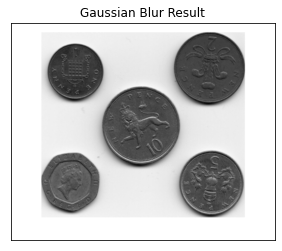

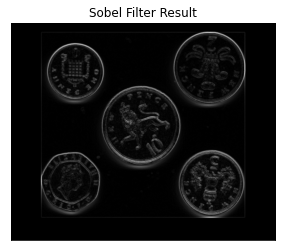

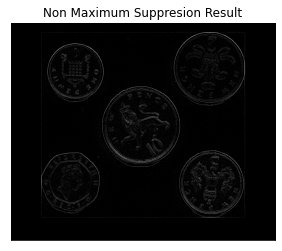

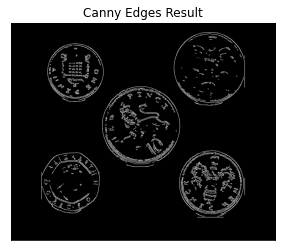

In [51]:
image = cv2.imread("DetectAndMeasureCircularObjectsThingSpeakExample_01.png")
image, gradient = Canny(image, 0, 50)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.title('Canny Edges Result')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()